<a href="https://colab.research.google.com/github/Prihatini21/project_ML/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Colab_Notebooks/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat '/content/drive/MyDrive/Colab_Notebooks/kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:01<00:00, 109MB/s]
100% 163M/163M [00:01<00:00, 113MB/s]


untuk mengengekstrak file zip di Google Cola


In [ ]:

!unzip /content/face-mask-dataset.zip

Output streaming akan dipotong hingga 5000 baris terakhir.
  inflating: data/with_mask/with_mask_3297.jpg  
  inflating: data/with_mask/with_mask_3298.jpg  
  inflating: data/with_mask/with_mask_3299.jpg  
  inflating: data/with_mask/with_mask_33.jpg  
  inflating: data/with_mask/with_mask_330.jpg  
  inflating: data/with_mask/with_mask_3300.jpg  
  inflating: data/with_mask/with_mask_3301.jpg  
  inflating: data/with_mask/with_mask_3302.jpg  
  inflating: data/with_mask/with_mask_3303.jpg  
  inflating: data/with_mask/with_mask_3304.jpg  
  inflating: data/with_mask/with_mask_3305.jpg  
  inflating: data/with_mask/with_mask_3306.jpg  
  inflating: data/with_mask/with_mask_3307.jpg  
  inflating: data/with_mask/with_mask_3308.jpg  
  inflating: data/with_mask/with_mask_3309.jpg  
  inflating: data/with_mask/with_mask_331.jpg  
  inflating: data/with_mask/with_mask_3310.jpg  
  inflating: data/with_mask/with_mask_3311.jpg  
  inflating: data/with_mask/with_mask_3312.jpg  
  inflating: d

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:

# untuk menampilkan sebagian file dalam sebuah direktori yang berada pada sistem file
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_571.jpg', 'with_mask_1317.jpg', 'with_mask_2041.jpg', 'with_mask_1350.jpg', 'with_mask_3129.jpg']
['with_mask_3095.jpg', 'with_mask_1839.jpg', 'with_mask_1703.jpg', 'with_mask_1928.jpg', 'with_mask_312.jpg']


In [ ]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2798.jpg', 'without_mask_3756.jpg', 'without_mask_3266.jpg', 'without_mask_1449.jpg', 'without_mask_3015.jpg']
['without_mask_3595.jpg', 'without_mask_490.jpg', 'without_mask_1946.jpg', 'without_mask_1305.jpg', 'without_mask_500.jpg']


In [ ]:

# untuk mencetak jumlah file dalam dua direktori yang berbeda

print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


1 = untuk yang memakai masker

0 = untuk yang tidak memkai masker

In [ ]:
# create the labels
# untuk membuat daftar label yang digunakan dalam proses pembelajaran mesin atau analisis data, di mana setiap file dalam dua set data diberi label yang sesuai.

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [ ]:
# melakukan dua operasi cetak (print) untuk menampilkan bagian awal dari dua daftar atau array

print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


untuk mencetak panjang (jumlah elemen) dari dua daftar atau array

In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**menampilkan gambar**

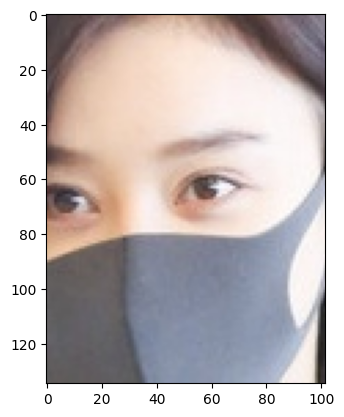

In [ ]:
# menampilkan gambar yang menggunakan masker
img = mpimg.imread('/content/data/with_mask/with_mask_1455.jpg')
imgplot = plt.imshow(img)
plt.show()

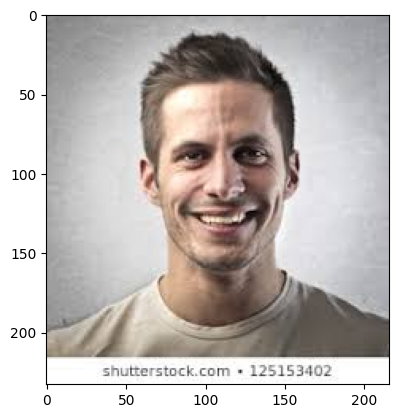

In [ ]:
# menampilkan gambar yang tidak menggunakan masker
img = mpimg.imread('/content/data/without_mask/without_mask_2355.jpg')
imgplot = plt.imshow(img)
plt.show()

memproses gambar dari dua direktori yang berbeda, satu untuk gambar dengan masker (with_mask_path) dan satu untuk gambar tanpa masker (without_mask_path).

In [ ]:
# mengonversi gambar menjadi array numpy+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[232, 217, 195],
        [233, 221, 203],
        [225, 214, 198],
        ...,
        [200, 179, 154],
        [185, 160, 135],
        [187, 160, 136]],

       [[227, 214, 193],
        [230, 219, 203],
        [222, 213, 198],
        ...,
        [183, 162, 136],
        [185, 160, 134],
        [204, 178, 153]],

       [[230, 217, 198],
        [226, 216, 201],
        [220, 213, 198],
        ...,
        [176, 156, 129],
        [206, 184, 156],
        [210, 185, 159]]], dtype=uint8)
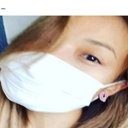

In [ ]:
data[0]

In [ ]:
type(data[0])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [ ]:
type(X)
type(Y)

numpy.ndarray

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
print(Y)

[1 1 1 ... 0 0 0]


Pemisahan data menjadi set pelatihan (train) dan set pengujian (test)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
# scaling the data
# membantu dalam proses pelatihan model machine learning

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [10,  6,  3],
        [10,  6,  3],
        [10,  6,  3]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [10,  6,  3],
        [10,  6,  3],
        [ 9,  5,  2]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 8,  4,  1],
        [ 9,  4,  2],
        [ 8,  4,  1]],

       ...,

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [16, 13, 11],
        [ 7,  7,  7],
        [ 4,  4,  4]],

       [[ 2,  2,  2],
        [ 2,  2,  2],
        [ 1,  1,  1],
        ...,
        [16, 14, 14],
        [ 7,  6,  6],
        [ 3,  3,  3]],

       [[ 1,  1,  1],
        [ 1,  1,  1],
        [ 1,  1,  1],
        ...,
        [17, 16, 19],
        [ 5,  4,  4],
        [ 2,  2,  2]]], dtype=uint8)
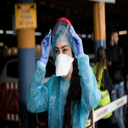

In [ ]:
X_train[0]

In [ ]:
# menampilkan array numpy yang merupakan representasi dari gambar pertama setelah skala nilai pikselnya menjadi rentang antara 0 dan 1.

X_train_scaled[0]

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.03921569, 0.02352941, 0.01176471],
        [0.03921569, 0.02352941, 0.01176471],
        [0.03921569, 0.02352941, 0.01176471]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.03921569, 0.02352941, 0.01176471],
        [0.03921569, 0.02352941, 0.01176471],
        [0.03529412, 0.01960784, 0.00784314]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.03137255, 0.01568627, 0.00392157],
        [0.03529412, 0.01568627, 0.00784314],
        [0.03137255, 0.01568627, 0.00392157]],

       ...,

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0

**Building a Convolutional Neural Networks (CNN)**

In [ ]:
import tensorflow as tf
from tensorflow import keras

**kerangka dasar dari sebuah model CNN**

In [ ]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [ ]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# melatih model dengan menggunakan data yang sudah diproses
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 185s 1s/step - loss: 0.1607 - acc: 0.9397 - val_loss: 0.2447 - val_acc: 0.9207
Epoch 2/5
170/170 [==============================] - 168s 989ms/step - loss: 0.1307 - acc: 0.9494 - val_loss: 0.2207 - val_acc: 0.9405
Epoch 3/5
170/170 [==============================] - 168s 992ms/step - loss: 0.1226 - acc: 0.9546 - val_loss: 0.2055 - val_acc: 0.9554
Epoch 4/5
170/170 [==============================] - 177s 1s/step - loss: 0.1144 - acc: 0.9614 - val_loss: 0.2364 - val_acc: 0.9322
Epoch 5/5
170/170 [==============================] - 162s 951ms/step - loss: 0.0913 - acc: 0.9674 - val_loss: 0.2979 - val_acc: 0.9421


In [ ]:
# untuk mengevaluasi performa model yang telah dilatih pada data pengujian
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 9s 183ms/step - loss: 0.3003 - acc: 0.9305
Test Accuracy = 0.9305095672607422


In [ ]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/data/with_mask/with_mask_10.jpg


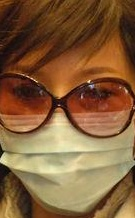

1/1 [==============================] - 0s 46ms/step
[[0.12028987 0.978715  ]]
1
The person in the image is wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Path of the image to be predicted: /content/data/without_mask/without_mask_100.jpg


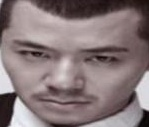

1/1 [==============================] - 0s 36ms/step
[[0.58427    0.44325867]]
0
The person in the image is not wearing a mask


In [ ]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')